In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay

In [2]:
df = pd.read_csv("data/super_scotus_text_preprocessed.csv")

In [3]:
df

,votes_detail,win_side,title,petitioner,respondent,year,docket_no,justia_summary,justia_sections
0,"{'j__john_g_roberts_jr': 1.0, 'j__elena_kagan'...",0,Abbott v. United States,Kevin Abbott,United States,2010,09-479,"{ 'opinion_summary ' : [ ] , 'primary_holding ...",{ 'Opinion ' : `` ( Ginsburg ) ' : '\\n\\n\\nO...
1,"{'j__john_g_roberts_jr': 1.0, 'j__antonin_scal...",1,"American Electric Power Co., Inc. v. Connecticut","American Electric Power Company Inc., et al.","Connecticut, et al.",2010,10-174,"{ 'opinion_summary ' : [ 'Plaintiffs , several...",{ 'Opinion ' : `` ( Ginsburg ) ' : '\\n\\n\\nO...
2,"{'j__john_g_roberts_jr': 1.0, 'j__antonin_scal...",1,Arizona Christian School Tuition Organization ...,Arizona Christian School Tuition Organization,"Kathleen M. Winn, et al.",2010,09-987,"{ 'opinion_summary ' : [ ] , 'primary_holding ...",{ 'Opinion ' : `` ( Kennedy ) ' : '\\n\\n\\nOP...
3,"{'j__john_g_roberts_jr': 1.0, 'j__antonin_scal...",1,Arizona Free Enterprise Club's Freedom Club PA...,Arizona Free Enterprise Club's Freedom Club PA...,"Ken Bennett, in His Official Capacity as Arizo...",2010,10-238,{ 'opinion_summary ' : [ 'The Arizona Citizens...,{ 'Opinion ' : ' ( Roberts ) \ ' : `` \\n\\n\\...
4,"{'j__john_g_roberts_jr': 1.0, 'j__antonin_scal...",1,Ashcroft v. Al-Kidd,John Ashcroft,Abdullah al-Kidd,2010,10-98,{ 'opinion_summary ' : [ `` Respondent alleged...,{ 'Opinion ' : `` ( Scalia ) ' : '\\n\\n\\nOPI...
...,...,...,...,...,...,...,...,...,...
401,"{'j__john_g_roberts_jr': 1.0, 'j__anthony_m_ke...",1,Welch v. United States,Gregory Welch,United States,2015,15-6418,{ 'opinion_summary ' : [ `` Possession firearm...,{ 'Opinion ' : `` ( Kennedy ) ' : '\\n\\nNOTIC...
402,"{'j__john_g_roberts_jr': 2.0, 'j__anthony_m_ke...",1,Whole Woman’s Health v. Hellerstedt,"Whole Woman’s Health, et al.","John Hellerstedt, Commissioner, Texas Departme...",2015,15-274,{ 'opinion_summary ' : [ 'Texas House Bill 2 (...,{ 'Opinion ' : `` ( Breyer ) ' : '\\n\\nNOTICE...
403,"{'j__john_g_roberts_jr': 2.0, 'j__anthony_m_ke...",1,Williams v. Pennsylvania,Terrance Williams,Pennsylvania,2015,15-5040,{ 'opinion_summary ' : [ 'Williams convicted 1...,{ 'Opinion ' : `` ( Kennedy ) ' : '\\n\\nNOTIC...
404,"{'j__john_g_roberts_jr': 1.0, 'j__anthony_m_ke...",0,Wittman v. Personhuballah,"Robert J. Wittman, et al.","Gloria Personhuballah, et al.",2015,14-1504,{ 'opinion_summary ' : [ `` Voters Virginias C...,{ 'Opinion ' : `` ( Breyer ) ' : '\\n\\nNOTICE...


In [4]:
X_text = df['justia_sections']  # Textual content
X_metadata = df.drop(columns=['justia_sections', 'win_side'])  # Metadata
y = df['win_side']  # Target variable

In [5]:
X_text_train, X_text_test, X_meta_train, X_meta_test, y_train, y_test = train_test_split(
    X_text, X_metadata, y, test_size=0.2, random_state=42)

In [6]:
# Text preprocessing: TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer() 
X_text_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train)
X_text_test_tfidf = tfidf_vectorizer.transform(X_text_test)

In [7]:
# Combine TF-IDF features with metadata features
X_train_text_tfidf_df = pd.DataFrame(X_text_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X_test_text_tfidf_df = pd.DataFrame(X_text_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# X_train = pd.concat([X_meta_train.reset_index(drop=True), X_train_text_tfidf_df], axis=1)
# X_test = pd.concat([X_meta_test.reset_index(drop=True), X_test_text_tfidf_df], axis=1)

In [8]:
X_train = X_train_text_tfidf_df

In [9]:
X_test = X_test_text_tfidf_df

In [10]:
X_train

,00,000,000000000001,000049,0001,00019,0003,0007,0008,0009,...,zucca,zumbach,zuni,zures,zurich,zurko,zweig,zwickler,ècole,über
0,0.0,0.009344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.018387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.001034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.0,0.001330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
321,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
322,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X_test

,00,000,000000000001,000049,0001,00019,0003,0007,0008,0009,...,zucca,zumbach,zuni,zures,zurich,zurko,zweig,zwickler,ècole,über
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.008595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.002843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.0,0.020934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
y

0      0
1      1
2      1
3      1
4      1
      ..
401    1
402    1
403    1
404    0
405    1
Name: win_side, Length: 406, dtype: int64

In [13]:
naive_bayes = MultinomialNB()
logistic_regression = LogisticRegression()

# Cross-validation to evaluate models
naive_bayes_cv_scores = cross_val_score(naive_bayes, X_train, y_train, cv=5)
logistic_regression_cv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5)

print('Naive Bayes Cross-Validation Scores:', naive_bayes_cv_scores)
print('Naive Bayes Mean Cross-Validation Score:', naive_bayes_cv_scores.mean())
print('Logistic Regression Cross-Validation Scores:', logistic_regression_cv_scores)
print('Logistic Regression Mean Cross-Validation Score:', logistic_regression_cv_scores.mean())

Naive Bayes Cross-Validation Scores: [0.61538462 0.64615385 0.64615385 0.64615385 0.65625   ]
Naive Bayes Mean Cross-Validation Score: 0.6420192307692307
Logistic Regression Cross-Validation Scores: [0.64615385 0.64615385 0.63076923 0.64615385 0.65625   ]
Logistic Regression Mean Cross-Validation Score: 0.6450961538461539


In [14]:
# Select the best model based on cross-validation scores
best_model = 'Naive Bayes' if naive_bayes_cv_scores.mean() > logistic_regression_cv_scores.mean() else 'Logistic Regression'

In [15]:
# Fit the selected model on the entire training dataset
if best_model == 'Naive Bayes':
    best_model = naive_bayes.fit(X_train, y_train_encoded)
else:
    best_model = logistic_regression.fit(X_train, y_train)

In [16]:
test_score = best_model.score(X_test, y_test)
print(f'Test Score of Best Model ({best_model}): {test_score}')

Test Score of Best Model (LogisticRegression()): 0.6219512195121951


In [17]:
y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        32
           1       0.62      1.00      0.76        50

    accuracy                           0.62        82
   macro avg       0.81      0.52      0.41        82
weighted avg       0.77      0.62      0.49        82



In [18]:
# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [19]:
precision

0.6172839506172839

In [20]:
recall

1.0

## Vizualizations

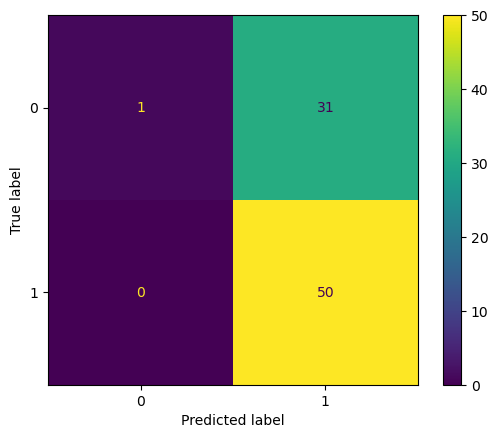

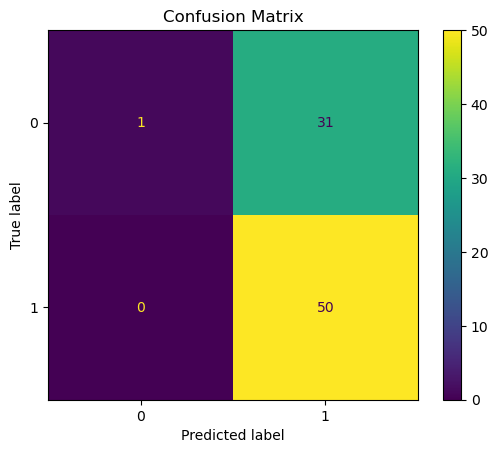

In [21]:
cm_display = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

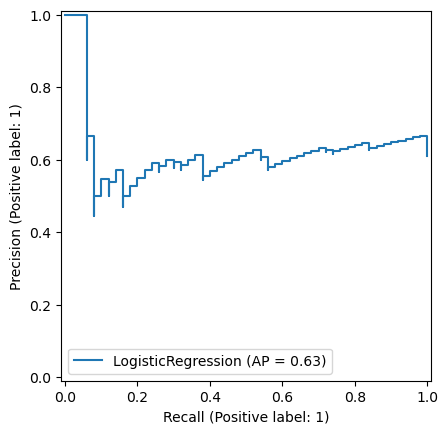

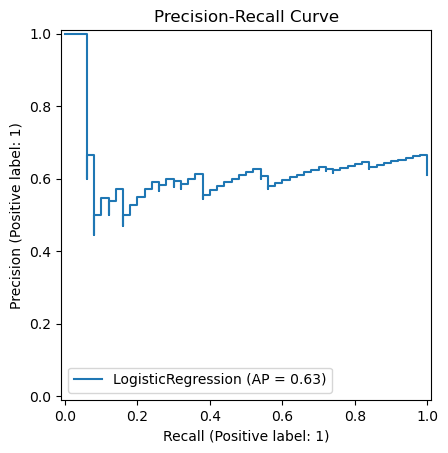

In [22]:
precision_recall_display = PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test)
precision_recall_display.plot()
plt.title('Precision-Recall Curve')
plt.show()

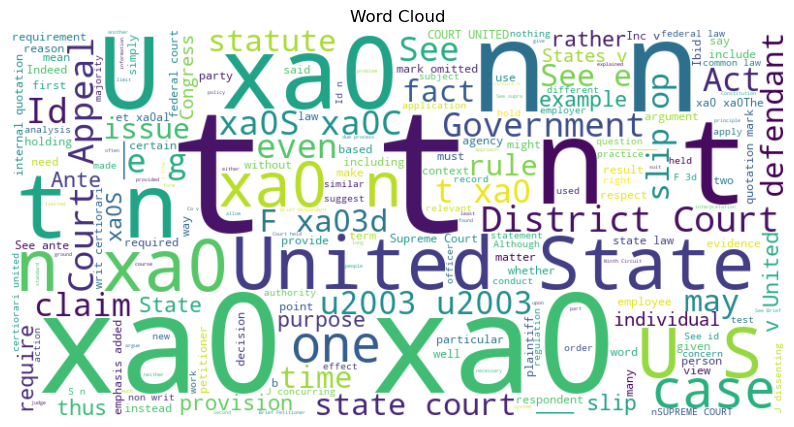

In [23]:
all_text = ' '.join(df['justia_sections'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()